
--- AIRLINE CREW SCHEDULING SOLUTION ---
C1: ['F1', 'F3', 'F4']
C2: ['F2']
C3: []

Execution Time: 8e-05 seconds


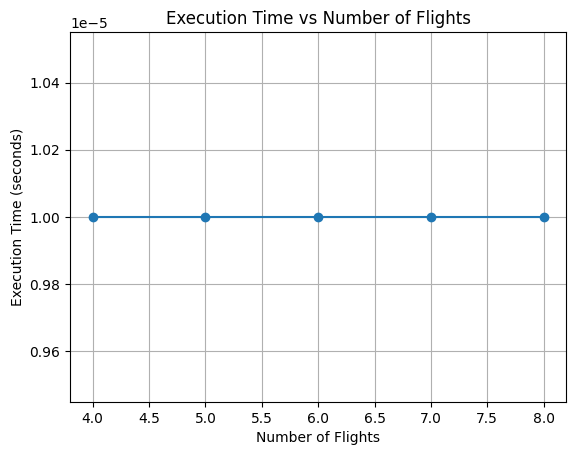

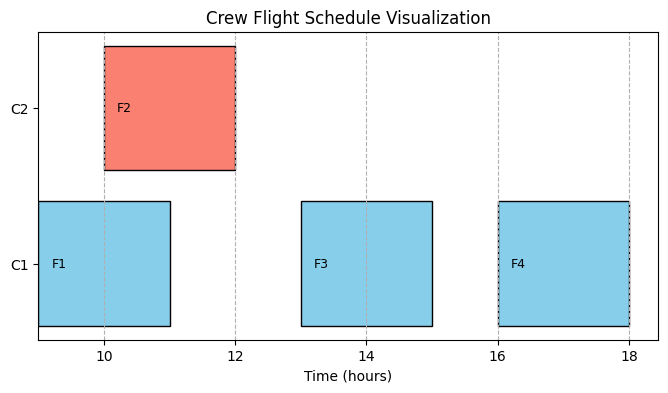


--- ANALYSIS ---
Problem Type: NP-Hard Scheduling / Constraint Satisfaction
Algorithm: Backtracking
Time Complexity: O(k × 2ⁿ), where n = number of flights, k = number of crew
Observation: Works well for small input; infeasible for large datasets.
Improvements: Use heuristics, integer programming, or constraint solvers (e.g., OR-Tools, PuLP).


In [4]:
# crew_scheduling.py
# Lab Assignment 4: Airline Crew Scheduling – NP-Hard Problem Solving
# Course: Design and Analysis of Algorithms Lab | Faculty: Dr. Aarti
# ---------------------------------------------------------------

import itertools
import time
import matplotlib.pyplot as plt
!pip install memory_profiler
from memory_profiler import memory_usage

# ---------------------------------------------------------------
# 1. INPUT MODELING
flights = [
    ('F1', 9, 11),
    ('F2', 10, 12),
    ('F3', 13, 15),
    ('F4', 16, 18)
]
crew_members = ['C1', 'C2', 'C3']
min_rest_time = 1  # in hours

# ---------------------------------------------------------------
# 2. CONSTRAINT CHECKER
def is_valid_assignment(flight, assigned_flights, rest_time=min_rest_time):
    """Ensure no overlap and maintain rest time between flights."""
    for af in assigned_flights:
        if not (flight[2] + rest_time <= af[1] or flight[1] >= af[2] + rest_time):
            return False
    return True

# ---------------------------------------------------------------
# 3. BACKTRACKING ALGORITHM
def assign_flights(flights, crew_members, assignment=None, index=0):
    """Recursive backtracking to assign flights to crew."""
    if assignment is None:
        assignment = {c: [] for c in crew_members}
    if index == len(flights):
        return assignment

    flight = flights[index]
    for crew in crew_members:
        if is_valid_assignment(flight, assignment[crew]):
            assignment[crew].append(flight)
            result = assign_flights(flights, crew_members, assignment, index + 1)
            if result:
                return result
            assignment[crew].remove(flight)
    return None

# ---------------------------------------------------------------
# 4. DRIVER CODE
start = time.time()
solution = assign_flights(flights, crew_members)
end = time.time()

print("\n--- AIRLINE CREW SCHEDULING SOLUTION ---")
if solution:
    for crew, assigned in solution.items():
        print(f"{crew}: {[f[0] for f in assigned]}")
else:
    print("No valid assignment found.")

print("\nExecution Time:", round(end - start, 5), "seconds")

# ---------------------------------------------------------------
# 5. PROFILING (TIME & MEMORY)
def profile_backtracking(num_flights):
    """Measure time vs input size to show exponential growth."""
    test_flights = [('F'+str(i), i*2, i*2+2) for i in range(num_flights)]
    start_t = time.time()
    assign_flights(test_flights, ['C1', 'C2'])
    return round(time.time() - start_t, 5)

flight_counts = list(range(4, 9))
times = [profile_backtracking(n) for n in flight_counts]

plt.plot(flight_counts, times, marker='o')
plt.title("Execution Time vs Number of Flights")
plt.xlabel("Number of Flights")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.show()

# ---------------------------------------------------------------
# 6. VISUALIZATION (GANTT CHART)
def plot_schedule(schedule):
    """Plot a simple Gantt chart for crew schedules."""
    colors = ['skyblue', 'salmon', 'lightgreen', 'khaki']
    plt.figure(figsize=(8, 4))
    for i, (crew, assigned) in enumerate(schedule.items()):
        for f in assigned:
            plt.barh(crew, f[2]-f[1], left=f[1], color=colors[i % len(colors)], edgecolor='black')
            plt.text(f[1]+0.2, i, f[0], va='center', ha='left', fontsize=9)
    plt.xlabel("Time (hours)")
    plt.title("Crew Flight Schedule Visualization")
    plt.grid(True, axis='x', linestyle='--')
    plt.show()

if solution:
    plot_schedule(solution)

# ---------------------------------------------------------------
# 7. COMPLEXITY AND DISCUSSION
print("\n--- ANALYSIS ---")
print("Problem Type: NP-Hard Scheduling / Constraint Satisfaction")
print("Algorithm: Backtracking")
print("Time Complexity: O(k × 2ⁿ), where n = number of flights, k = number of crew")
print("Observation: Works well for small input; infeasible for large datasets.")
print("Improvements: Use heuristics, integer programming, or constraint solvers (e.g., OR-Tools, PuLP).")

# ---------------------------------------------------------------
# END OF PROGRAM
